[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.series.Series'> (1760,)


18:40:00 - cmdstanpy - INFO - Chain [1] start processing
18:40:00 - cmdstanpy - INFO - Chain [1] done processing


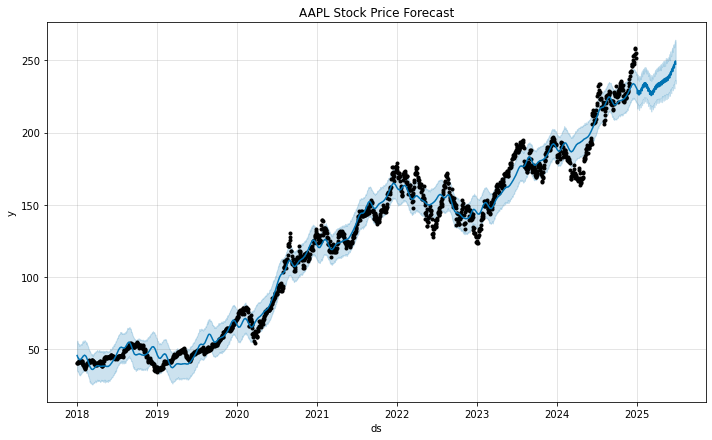

In [6]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. Download stock data
data = yf.download('AAPL', start='2018-01-01', end='2024-12-31')

# 2. Prepare data for Prophet
df = pd.DataFrame()
df['ds'] = data.index
df['y'] = data['Close'].values

# Check types (optional debug print)
print(type(df['y']), df['y'].shape)

# 3. Initialize and fit model
model = Prophet()
model.fit(df)

# 4. Make future dataframe & forecast
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# 5. Plot forecast
fig1 = model.plot(forecast)
fig1.savefig("forecast_plot.png")
plt.title("AAPL Stock Price Forecast")
plt.show()
